In [1]:
# For interactive plots, comment the next line
%pylab inline

# For interactive plots, uncomment the next line
# %pylab ipympl

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to load array data (numerical list, numpy array) data collected into a PODPAC node.

<small>*For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file.*</small>

## Setup

Make sure you have PODPAC installed:

```
$ pip install podpac
```


## Array Data

In [2]:
from podpac.data import Array
from podpac import Coordinates
import numpy as np

# mock data
data = np.random.rand(5, 5)
data

array([[0.06348447, 0.34193911, 0.97308759, 0.81395896, 0.06072724],
       [0.50319313, 0.76507486, 0.29093598, 0.85994006, 0.12846428],
       [0.24572694, 0.58635485, 0.16448074, 0.38537641, 0.41280708],
       [0.37972809, 0.42744703, 0.49660732, 0.10455079, 0.03571759],
       [0.05913786, 0.81080463, 0.38772104, 0.24034522, 0.04917224]])

In [3]:
# create native coordinates for data
lat = np.linspace(-10, 10, 5)
lon = np.linspace(-10, 10, 5)
native_coords = Coordinates([lat, lon], ['lat', 'lon'])
native_coords

Coordinates (EPSG:4326)
	lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']

In [4]:
# create Array DataSource node
node = Array(source=data, native_coordinates=native_coords)
node

Array DataSource
	source: 
[[0.06348447 0.34193911 0.97308759 0.81395896 0.06072724]
 [0.50319313 0.76507486 0.29093598 0.85994006 0.12846428]
 [0.24572694 0.58635485 0.16448074 0.38537641 0.41280708]
 [0.37972809 0.42744703 0.49660732 0.10455079 0.03571759]
 [0.05913786 0.81080463 0.38772104 0.24034522 0.04917224]]
	native_coordinates: 
		lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
		lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5], ctype['midpoint']
	interpolation: nearest

In [5]:
# evaluate this note at its native coordinates
output = node.eval(node.native_coordinates)
output

<xarray.UnitsDataArray (lat: 5, lon: 5)>
array([[0.063484, 0.341939, 0.973088, 0.813959, 0.060727],
       [0.503193, 0.765075, 0.290936, 0.85994 , 0.128464],
       [0.245727, 0.586355, 0.164481, 0.385376, 0.412807],
       [0.379728, 0.427447, 0.496607, 0.104551, 0.035718],
       [0.059138, 0.810805, 0.387721, 0.240345, 0.049172]])
Coordinates:
  * lat      (lat) float64 -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 -10.0 -5.0 0.0 5.0 10.0
Attributes:
    layer_style:  <podpac.core.style.Style object at 0x000001D2B158F208>
    crs:          EPSG:4326

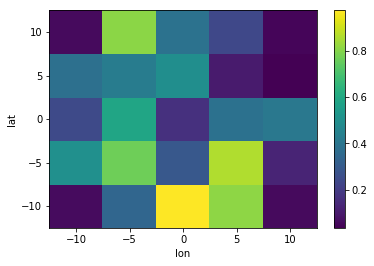

In [6]:
output.plot()
pass

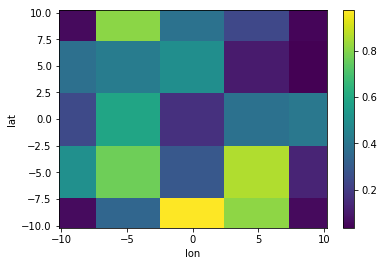

In [7]:
# scale down data
# default interpolation is nearest neighbor
coords = Coordinates([np.linspace(-10, 10, 50), np.linspace(-10, 10, 50)], ['lat', 'lon'])
output = node.eval(coords)
output.plot()
pass

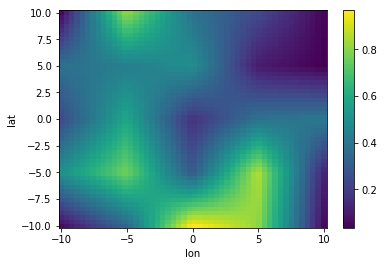

In [8]:
# scale down and use bilinear interpolation
node.interpolation = 'bilinear'
output = node.eval(coords)
output.plot()
pass